# Pymaceuticals Inc.
---
### Background

You've just joined Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

The executive team has tasked you with generating all of the tables and figures needed for the technical report of the clinical study. They have also asked you for a top-level summary of the study results.

### Data Cleaning and Summary Statistics

We first cleaned the data by finding and removing duplicate mice that were identified in the tests.
With the data gathered, summary statistics were obtained for each of the pharmacological regimens to see the behavior of tumor volumes.
We printed data as mean, median, variance, and standard deviation of the drug regimens related to tumor volumes to get a sense of these measurements with each of the drug regimens. With this table we obtained that in the first instance Capomuline and Ramicane have the lowest average tumor volume.

### Line and Pie Chart Analysis

We made a line graph to see each drug regimen versus the number of time points observed in the mouse in the test. We can see that the 3 biggest were Capomulin, Ramicane and Ketapril.
We then made a pie chart to see the male and female distribution of the population. In the pie chart we saw that we have a balanced population with a gender distribution of almost 50/50. This allows us to see that the results would not be affected by having a distribution more loaded towards a specific gender.

### Box Plot and Line Chart Analysis 

We did a boxplot analysis for the capomulin, ramicane, infubinol, and ceftamine drug regimens to see the average tumor volume for each regimen. In the graph we can see that treatments with Capomulin and Ramicane have less tumor volumes than treatments with Indubinol and Ceftamin drugs. We could also see in this graph that infubinol has an outlier near the average of the ramican and capomulin regimens. We then made a line graph to see the evolution of tumor size for a given mouse and drug regimen over time.
With the line graph we choose the mouse with ID l509 on Capomulin regimen to see the evolution of tumor volume. From the graph we got that at the end of the time points there was a considerable reduction in the tumor volume, which tells us that the drug Capomulin has good results in the expected result.

### Scatter Plot and Correlation Analysis

We made a scatter plot to see the weight versus the average tumor volume observed to see if there is a correlation between these 2 parameters and we found that there is a strong correlation between them as we obtained an index of 0.84 and an index of 1. indicates a perfect correlation. In the graph we can see that as the weight of the mice increases, the tumor volume increases, so we can give this information to the conclusions department so that they can point out this fact in the pharmacological regimen indications and take this into consideration in the clinical profile of the study subjects.

### Extra: line charts with another drugs regimen and Conclusions

We made an additional graph of the evolution of tumor volume with the Ketapril regimen in other mice to compare the evolution in a line graph and we saw that this drug is inverse in results to both the drug of interest behaviour and the volume of the tumor. The tumor volume increases over time rather than decreasing.

We also made another graph of the evolution of tumor volume with the Raticane regimen since in the other results that we took in this analysis we saw that this drug behaved very similar to Capomulin but in this graph we saw that the behavior is not as expected since tumor volume increased over time rather than decreased. Therefore, we could say that the study is satisfactory for Capomulin in terms of the expected efficacy compared to the other regimens.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib import colors as mcolors
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/luisgalindez/Documents/challengue-5/challengue-5/challengue-5/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/luisgalindez/Documents/challengue-5/challengue-5/challengue-5/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
unique_mice = combined_df['Mouse ID'].nunique()
unique_mice

249

In [45]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep= False)]
duplicated_mice

duplicate_mouse_id = duplicated_mice['Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates2 = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicates2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_clean_df = combined_df[combined_df["Mouse ID"] != 'g989']
new_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [47]:
# Checking the number of mice in the clean DataFrame.
new_number_mice = new_clean_df["Mouse ID"].nunique()
new_number_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

tumor_volume_mean= new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_median= new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_variance= new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_stddev= new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_count = new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()

tumor_volume_sem = tumor_volume_stddev / tumor_volume_count ** 0.5 

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": tumor_volume_mean,
    "Median Tumor Volume": tumor_volume_median,
    "Variance Tumor Volume": tumor_volume_variance,
    "Standard Deviation of Tumor Volume (mm3)": tumor_volume_stddev,
    "Standard Error of the Mean (SEM)": tumor_volume_sem,
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation of Tumor Volume (mm3),Standard Error of the Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_2 = new_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: st.sem(x)  
).reset_index()

summary_stats_2

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

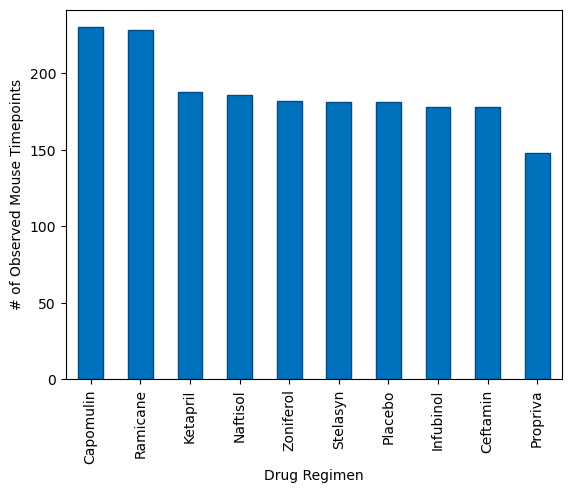

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = new_clean_df['Drug Regimen'].value_counts()
plt.figure()  
regimen_counts.plot(kind='bar', x='Drug Regimen', y='Total Rows',
                    color="#0072BD", edgecolor="#004B87")
plt.xlabel('Drug Regimen', fontsize=10)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=10)

plt.show()

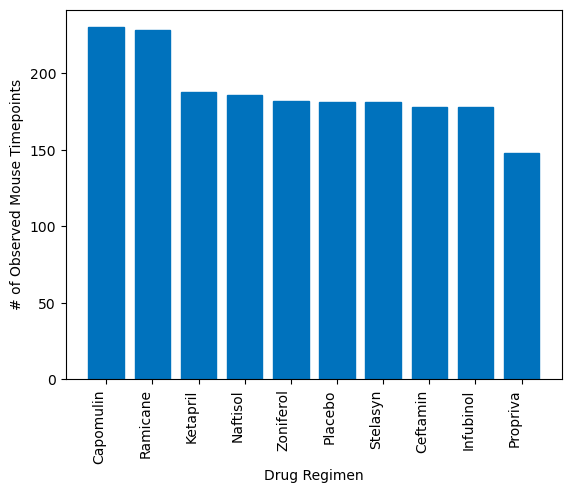

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

per_regimen_r = new_clean_df.groupby('Drug Regimen').size()
per_regimen_df = per_regimen_df.sort_values(by='Total Rows', ascending=False)

# Create a bar plot of total rows for each drug regimen
plt.figure()  
plt.bar(per_regimen_df['Drug Regimen'], per_regimen_df['Total Rows'], color="#0072BD", edgecolor="#0072BD", width=0.77)
plt.xlabel('Drug Regimen', fontsize=10)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.show()

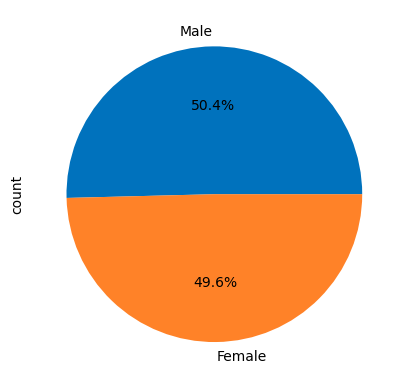

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = new_clean_df[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
colors = [(*mcolors.hex2color('#0072BD'), 1),  
          (*mcolors.hex2color('#ff7410'), 0.9)] 
plt.figure()  
gender_counts.plot.pie(autopct='%1.1f%%', colors=colors,)
plt.show()

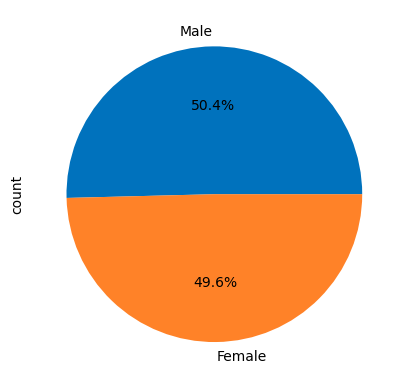

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

colors = [(*mcolors.hex2color('#0072BD'), 1),  
          (*mcolors.hex2color('#ff7410'), 0.9)] 
plt.figure() 
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, )
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_df = new_clean_df[new_clean_df['Drug Regimen'].isin(treatment_regimens)]
last_timepoint_df = filtered_df.loc[filtered_df.groupby('Mouse ID')['Timepoint'].idxmax()]
last_timepoint_df = last_timepoint_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]


In [64]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
outliers_dict = {}
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
for treatment in treatment_regimens:
    subset = last_timepoint_df[last_timepoint_df['Drug Regimen'] == treatment]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes then append the empty list
    tumor_volumes = subset['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes.tolist())  
    
    # Calculate IQR
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    if outliers.empty:
        outliers_dict[treatment] = "Series([], Name: Tumor Volume (mm3), dtype: float64)"
    else:
        outliers_dict[treatment] = outliers['Tumor Volume (mm3)']
    print(f"{treatment}'s potential outliers: {outliers_dict[treatment]}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 420    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


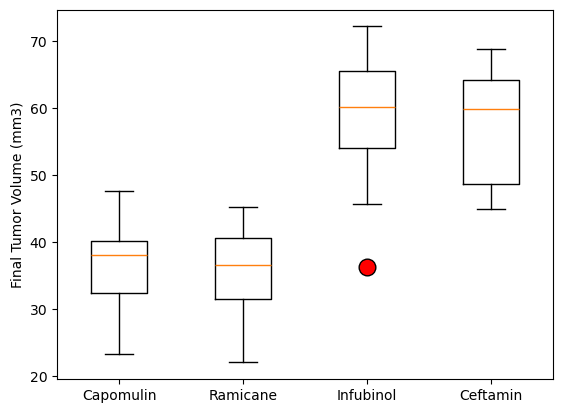

In [27]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, 
             flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=12))
ax1.set_xticklabels(treatment_regimens)
plt.show()

## Line and Scatter Plots

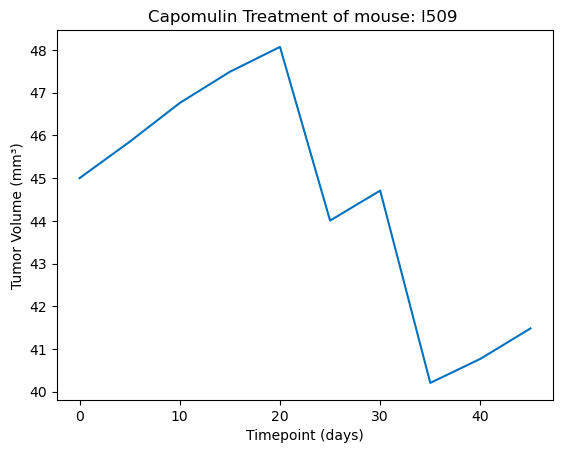

In [77]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = new_clean_df[new_clean_df['Drug Regimen'] == 'Capomulin']

mouse_id = "l509"
mouse_data = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color="#0072BD", linestyle='-')
plt.title(f'Capomulin Treatment of mouse: {mouse_id} ')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm³)')
plt.show()

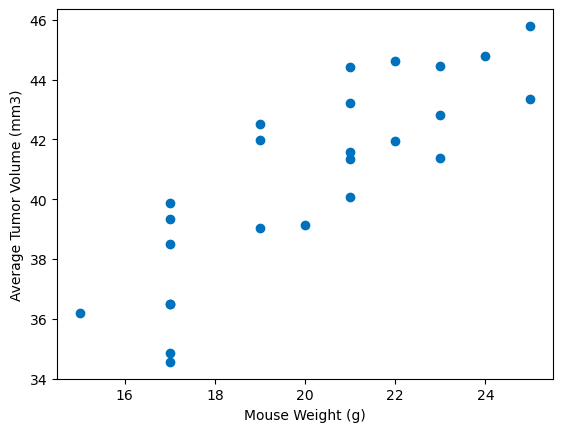

In [69]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_group = capomulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(cap_group['Weight (g)'], cap_group['Tumor Volume (mm3)'], color="#0072BD", alpha=1)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


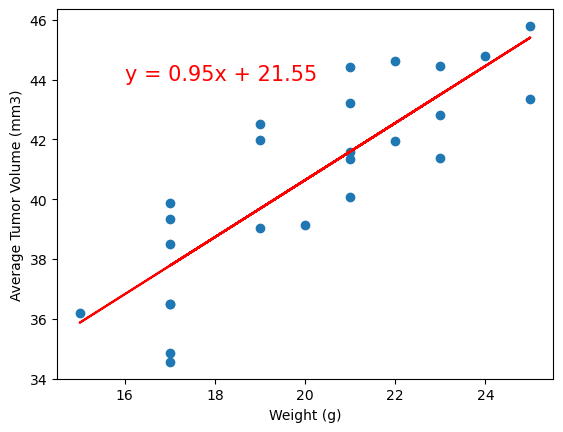

In [67]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = cap_group['Weight (g)']
y_values = cap_group['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")
plt.show()

### Extra: Line charts with another drug regimens

In [79]:
ketapril_df = new_clean_df[new_clean_df['Drug Regimen'] == 'Ketapril']
ketapril_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
5,h246,0,45.000000,0,Ketapril,Male,13,30
...,...,...,...,...,...,...,...,...
1796,h246,45,74.104086,2,Ketapril,Male,13,30
1803,k382,45,73.715619,4,Ketapril,Male,22,29
1805,w422,45,67.989530,4,Ketapril,Female,18,26
1807,y260,45,62.909441,4,Ketapril,Female,7,25


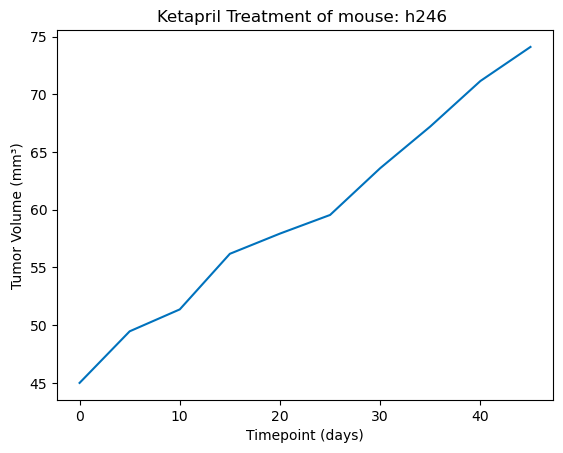

In [82]:
mouse_id = "h246"
mouse_data = ketapril_df[ketapril_df['Mouse ID'] == mouse_id]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color="#0072BD", linestyle='-')
plt.title(f'Ketapril Treatment of mouse: {mouse_id} ')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm³)')
plt.show()

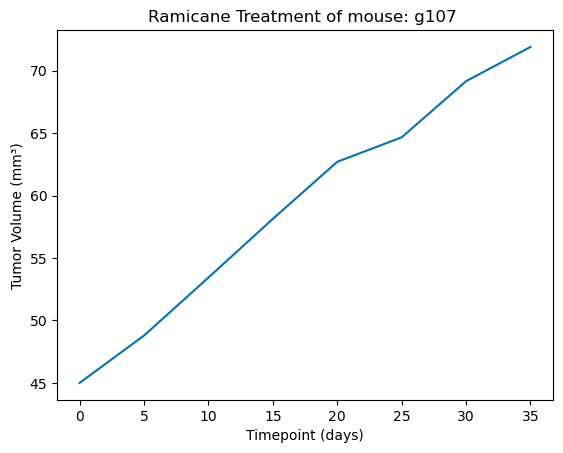

In [86]:
ramicane_df = new_clean_df[new_clean_df['Drug Regimen'] == 'Ramicane']
ramicane_df
mouse_id = "g107"
mouse_data = ketapril_df[ketapril_df['Mouse ID'] == mouse_id]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color="#0072BD", linestyle='-')
plt.title(f'Ramicane Treatment of mouse: {mouse_id} ')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm³)')
plt.show()